<a href="https://colab.research.google.com/github/meganlcole327/MLA_MLC/blob/main/FinalProject_Classification_MLC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Final Project - Classification

CS 430 - ON

Machine Learning in the Cloud

Megan Cole

#Standard Imports


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#Specific Imports

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


#Imports for Splitting Data and Building Pipeline

In [31]:
from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.pipeline import Pipeline
from sklearn import set_config
set_config(display='diagram')

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder

#Imports for Performance Measures

In [44]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import accuracy_score

#Confusion Matrix Function

In [6]:
def plot_cm(y_test, y_pred):
    cm = confusion_matrix(y_test,y_pred)
    fig = plt.figure(figsize=(10,10))
    heatmap = sns.heatmap(cm, annot=True, fmt='.2f', cmap='RdYlGn')
    plt.ylabel('True label')
    plt.xlabel('Predicted Label')


#ROC_Curve Function

In [7]:
def plot_roc_curve(fpr,tpr):
  plt.plot(fpr, tpr, linewidth=2)
  plt.plot([0,1],[0,1], 'k--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.0])

#Problem 2 - Classification

#Aquire Data

Reading the Data:

This datasets includes different features that are used at predicting the recurrence of thyroid cancer. Data was collected over a 15 year period, with each one of the patients being followed for 10 years or more.


Dataset Citation:

Borzooei, S. & Tarokhian, A. (2023). Differentiated Thyroid Cancer Recurrence [Dataset]. UCI Machine Learning Repository. https://doi.org/10.24432/C5632J.

In [32]:
file_path = '/content/gdrive/MyDrive/BU/CS430/Thyroid_Diff.csv'
df = pd.read_csv(file_path)
df.columns = df.columns.str.strip()
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


#Statistical and Visual Exploration

In [35]:
print(df.columns)

Index(['Age', 'Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response', 'Recurred'],
      dtype='object')


In [33]:
df.info()
df.describe(include='all')

print("Missing values per column:")
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

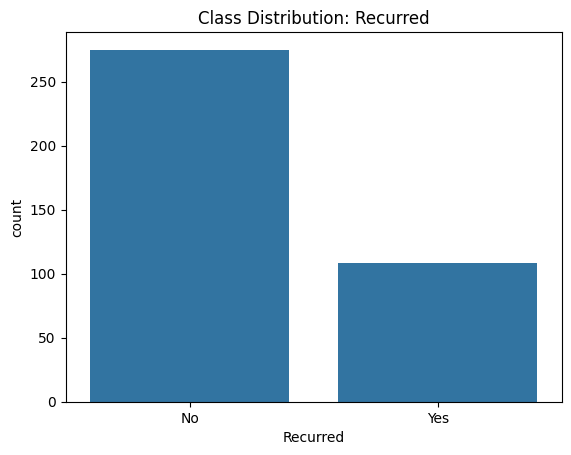

In [34]:
sns.countplot(x='Recurred', data=df)
plt.title('Class Distribution: Recurred')
plt.show()

#Split data into train/test

In [36]:
X = df.drop('Recurred', axis=1)
y = df['Recurred']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

cat_cols = X.select_dtypes(include='object').columns

preprocessor = ColumnTransformer(
    transformers=[('cat', OneHotEncoder(drop='first', handle_unknown='ignore'), cat_cols)],
    remainder='passthrough'
)

#Building the Pipeline

In [37]:
pipe_lr = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', LogisticRegression())
])

pipe_rf = Pipeline([
    ('preprocessing', preprocessor),
    ('clf', RandomForestClassifier(random_state=42))
])

#Executing the Model

In [50]:
pipe_lr.fit(X_train, y_train)

param_grid = {
    'clf__n_estimators': [50, 100],
    'clf__max_depth': [None, 5, 10]
}

from sklearn.model_selection import GridSearchCV
grid_rf = GridSearchCV(pipe_rf, param_grid, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_encoders.py:246: UserWarning: Found unknown categories in columns [6] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklea

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('cat',
                                                                         OneHotEncoder(drop='first',
                                                                                       handle_unknown='ignore'),
                                                                         Index(['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy',
       'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology',
       'Focality', 'Risk', 'T', 'N', 'M', 'Stage', 'Response'],
      dtype='object'))])),
                                       ('clf',
                                        RandomForestClassifier(random_state=42))]),
             param_grid={'clf__max_depth': [None, 5, 10],
                         'clf__n_estimators': [50, 100]},
             scoring='accuracy')

#Evaluate the Model

In [45]:
#Predictions
y_pred_lr = pipe_lr.predict(X_test)
y_pred_rf = grid_rf.predict(X_test)

Logistic Regression Results
              precision    recall  f1-score   support

          No       0.98      0.98      0.98        58
         Yes       0.95      0.95      0.95        19

    accuracy                           0.97        77
   macro avg       0.97      0.97      0.97        77
weighted avg       0.97      0.97      0.97        77



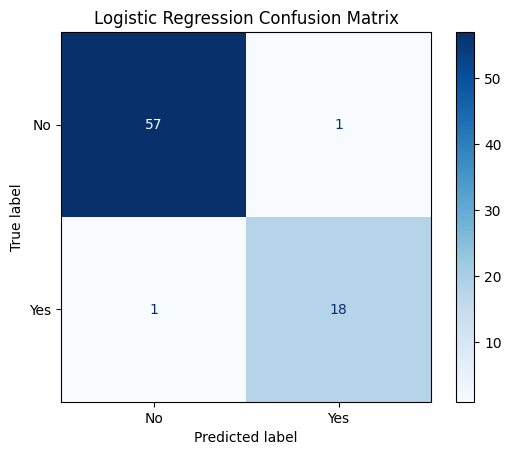

In [46]:
#Logistic Regression
print("Logistic Regression Results")
print(classification_report(y_test, y_pred_lr))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr, display_labels=['No', 'Yes'], cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

Random Forest Results
Best Parameters: {'clf__max_depth': 10, 'clf__n_estimators': 50}
              precision    recall  f1-score   support

          No       0.98      1.00      0.99        58
         Yes       1.00      0.95      0.97        19

    accuracy                           0.99        77
   macro avg       0.99      0.97      0.98        77
weighted avg       0.99      0.99      0.99        77



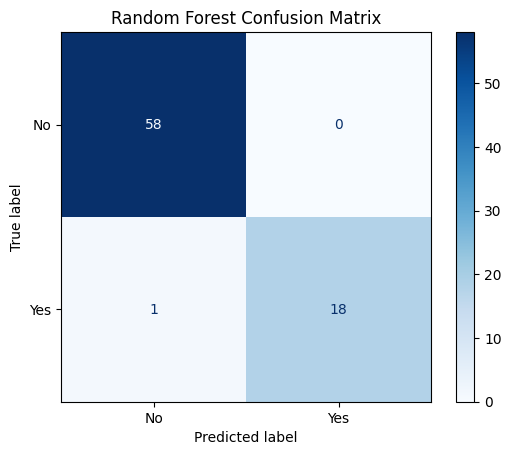

In [48]:
# Random Forest
print("Random Forest Results")
print("Best Parameters:", grid_rf.best_params_)
print(classification_report(y_test, y_pred_rf))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf, display_labels=['No', 'Yes'], cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.show()

In [49]:
#Accuracy Scores
acc_lr = accuracy_score(y_test, y_pred_lr)
acc_rf = accuracy_score(y_test, y_pred_rf)

print("\nModel Comparison Summary:")
print("- Logistic Regression:")
print(f"  - Accuracy: {acc_lr:.4f}")
print("- Random Forest:")
print(f"  - Accuracy: {acc_rf:.4f}")
print(f"  - Best Parameters from GridSearch: {grid_rf.best_params_}")


Model Comparison Summary:
- Logistic Regression:
  - Accuracy: 0.9740
- Random Forest:
  - Accuracy: 0.9870
  - Best Parameters from GridSearch: {'clf__max_depth': 10, 'clf__n_estimators': 50}


#Conclusion

In this project, I compared two classification models, logistic regression and random forest to determine the recurrence of thryoid cancer in the data. The random forest model outperformed logistic regression in terms of accuracy, F1 score, and recall. This is likely due to its ability to capture nonlinear patterns and interactions between features, which logistic regression cannot handle as effectively. Therefore, I think a rondom forest would be better to use for a dataset like this one.

